In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heat
from mcmc import Random_Walk

Text(0, 0.5, 'u')

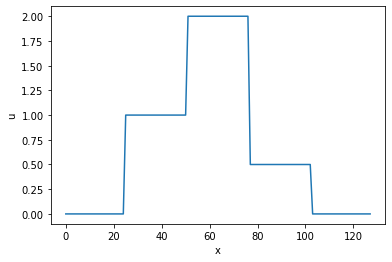

In [15]:
N=128
dx = np.pi/(N+1)
x = np.linspace(dx,np.pi,N,endpoint=False)
field = heat.step_field(N)
p = np.array( [1,2,0.5] )
field.set_params(p)
true_init = field.give_real_func()
plt.plot(true_init)
plt.xlabel('x')
plt.ylabel('u')

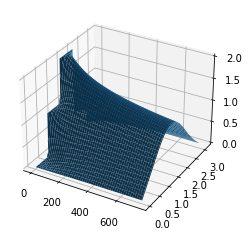

In [16]:
problem = heat.heat(field_type="step")
problem.set_init_cond(true_init)    
problem.time_stepping()

In [17]:
y_obs = prob.advance_with_init_cond(true_init)
SNR = 100
sigma = np.linalg.norm(y_obs)/SNR
sigma2 = sigma*sigma

In [18]:
pi_like = lambda p: - ( 0.5*np.sum(  (problem.forward(p) - y_obs)**2)/sigma2)
p0 = np.zeros(3)
Ns = 10000
Nb = 10
RWM = Random_Walk(pi_like,p0)
RWM.sample(Ns,Nb)

100% (10009 of 10009) |##################| Elapsed Time: 0:00:26 Time:  0:00:26


In [19]:
RWM.print_stat()
samples, target = RWM.give_stats()

0.3412587412587413


In [20]:
p_mean = np.mean(samples[300:,:],axis=0)
field = heat.step_field(3)
field.set_params(p_mean)
f = field.give_real_func()

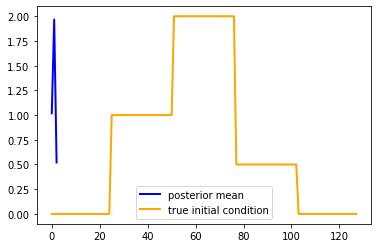

In [22]:
plt.plot(f,label=r'posterior mean',color="blue",linewidth=2.)
plt.plot(true_init,label=r'true initial condition',color="orange",linewidth=2.)
plt.legend()